## COVID 19 State Wise Analysis

### Team 1
1. Kirat Saran - 550246249
2. Pranav Addipalli - 482561915
3. Vinit Horakeri - 537701299

Submission Date: 12/10/2021

### Importing Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
#import statsmodels.api as sm
#from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
#from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
#from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
#from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
#from statsmodels.tsa.stattools import adfuller
#std=StandardScaler()

In [2]:
# setting up few restrictions
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [3]:
#reading data
df = pd.read_csv("all-states-history.csv")
df

date state    death  deathConfirmed  deathIncrease  \
0      2021-03-07    AK    305.0             NaN              0   
1      2021-03-07    AL  10148.0          7963.0             -1   
2      2021-03-07    AR   5319.0          4308.0             22   
3      2021-03-07    AS      0.0             NaN              0   
4      2021-03-07    AZ  16328.0         14403.0              5   
...           ...   ...      ...             ...            ...   
20775  2020-01-17    WA      NaN             NaN              0   
20776  2020-01-16    WA      NaN             NaN              0   
20777  2020-01-15    WA      NaN             NaN              0   
20778  2020-01-14    WA      NaN             NaN              0   
20779  2020-01-13    WA      NaN             NaN              0   

       deathProbable  hospitalized  hospitalizedCumulative  \
0                NaN        1293.0                  1293.0   
1             2185.0       45976.0                 45976.0   
2             1011.0       14926.0                 14926.0   
3                NaN           NaN                     NaN   
4             1925.0       57907.0                 57907.0   
...              ...           ...                     ...   
20775            NaN           NaN                     NaN   
20776            NaN           NaN                     NaN   
20777            NaN           NaN                     NaN   
20778            NaN           NaN                     NaN   
20779            NaN           NaN                     NaN   

       hospitalizedCurrently  hospitalizedIncrease  ...  totalTestResults  \
0                       33.0                     0  ...         1731628.0   
1                      494.0                     0  ...         2323788.0   
2                      335.0                    11  ...         2736442.0   
3                        NaN                     0  ...            2140.0   
4                      963.0                    44  ...         7908105.0   
...                      ...                   ...  ...               ...   
20775                    NaN                     0  ...               NaN   
20776                    NaN                     0  ...               NaN   
20777                    NaN                     0  ...               NaN   
20778                    NaN                     0  ...               NaN   
20779                    NaN                     0  ...               NaN   

       totalTestResultsIncrease  totalTestsAntibody  totalTestsAntigen  \
0                             0                 NaN                NaN   
1                          2347                 NaN                NaN   
2                          3380                 NaN                NaN   
3                             0                 NaN                NaN   
4                         45110            580569.0                NaN   
...                         ...                 ...                ...   
20775                         0                 NaN                NaN   
20776                         0                 NaN                NaN   
20777                         0                 NaN                NaN   
20778                         0                 NaN                NaN   
20779                         0                 NaN                NaN   

       totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
0                           NaN                      NaN   
1                      119757.0                      NaN   
2                           NaN                 481311.0   
3                           NaN                      NaN   
4                      444089.0                      NaN   
...                         ...                      ...   
20775                       NaN                      NaN   
20776                       NaN                      NaN   
20777                       NaN                      NaN   
20778                       NaN                  

In [4]:
# checking the datset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  nega

In [5]:
#checking for count of null values
df.isnull().sum()

date                                 0
state                                0
death                              850
deathConfirmed                   11358
deathIncrease                        0
                                 ...  
totalTestsPeopleAntigen          19781
totalTestsPeopleViral            11583
totalTestsPeopleViralIncrease        0
totalTestsViral                   6264
totalTestsViralIncrease              0
Length: 41, dtype: int64

### Data Cleaning

In [6]:
# Replacing Null Values
df = df.replace(np.nan,0)
df.isnull().sum()

date                             0
state                            0
death                            0
deathConfirmed                   0
deathIncrease                    0
                                ..
totalTestsPeopleAntigen          0
totalTestsPeopleViral            0
totalTestsPeopleViralIncrease    0
totalTestsViral                  0
totalTestsViralIncrease          0
Length: 41, dtype: int64

Since all the values in this dataset are factual values, we cannot impute them with mean, median etc. Hence, we have replcaed them all with 0s.

In [7]:
# Setting the index to date which will help in implementing time-series anlysis
df_new = df.set_index(['date'], append = True)
df_new

state    death  deathConfirmed  deathIncrease  deathProbable  \
      date                                                                      
0     2021-03-07    AK    305.0             0.0              0            0.0   
1     2021-03-07    AL  10148.0          7963.0             -1         2185.0   
2     2021-03-07    AR   5319.0          4308.0             22         1011.0   
3     2021-03-07    AS      0.0             0.0              0            0.0   
4     2021-03-07    AZ  16328.0         14403.0              5         1925.0   
...                ...      ...             ...            ...            ...   
20775 2020-01-17    WA      0.0             0.0              0            0.0   
20776 2020-01-16    WA      0.0             0.0              0            0.0   
20777 2020-01-15    WA      0.0             0.0              0            0.0   
20778 2020-01-14    WA      0.0             0.0              0            0.0   
20779 2020-01-13    WA      0.0             0.0              0            0.0   

                  hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
      date                                                                      
0     2021-03-07        1293.0                  1293.0                   33.0   
1     2021-03-07       45976.0                 45976.0                  494.0   
2     2021-03-07       14926.0                 14926.0                  335.0   
3     2021-03-07           0.0                     0.0                    0.0   
4     2021-03-07       57907.0                 57907.0                  963.0   
...                        ...                     ...                    ...   
20775 2020-01-17           0.0                     0.0                    0.0   
20776 2020-01-16           0.0                     0.0                    0.0   
20777 2020-01-15           0.0                     0.0                    0.0   
20778 2020-01-14           0.0                     0.0                    0.0   
20779 2020-01-13           0.0                     0.0                    0.0   

                  hospitalizedIncrease  inIcuCumulative  ...  \
      date                                               ...   
0     2021-03-07                     0              0.0  ...   
1     2021-03-07                     0           2676.0  ...   
2     2021-03-07                    11              0.0  ...   
3     2021-03-07                     0              0.0  ...   
4     2021-03-07                    44              0.0  ...   
...                                ...              ...  ...   
20775 2020-01-17                     0              0.0  ...   
20776 2020-01-16                     0              0.0  ...   
20777 2020-01-15                     0              0.0  ...   
20778 2020-01-14                     0              0.0  ...   
20779 2020-01-13                     0              0.0  ...   

                  totalTestResults  totalTestResultsIncrease  \
      date                                                     
0     2021-03-07         1731628.0                         0   
1     2021-03-07         2323788.0                      2347   
2     2021-03-07         2736442.0                      3380   
3     2021-03-07            2140.0                         0   
4     2021-03-07         7908105.0                     45110   
...                            ...                       ...   
20775 2020-01-17               0.0                         0   
20776 2020-01-16               0.0                         0   
20777 2020-01-15               0.0                         0   
20778 2020-01-14               0.0                         0   
20779 2020-01-13               0.0                         0   

                  totalTestsAntibody  totalTestsAntigen  \
      date                                                
0     2021-03-07                 0.0                0.0   
1     2021-03-07                 0.0                0.0   
2     2

In [8]:
# checking for duplicates
duplicate_rows_df = df[df.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape) 

number of duplicate rows:  (0, 41)


In [9]:
#Dropping the duplicate values
df = df.drop_duplicates()   
df

date state    death  deathConfirmed  deathIncrease  \
0      2021-03-07    AK    305.0             0.0              0   
1      2021-03-07    AL  10148.0          7963.0             -1   
2      2021-03-07    AR   5319.0          4308.0             22   
3      2021-03-07    AS      0.0             0.0              0   
4      2021-03-07    AZ  16328.0         14403.0              5   
...           ...   ...      ...             ...            ...   
20775  2020-01-17    WA      0.0             0.0              0   
20776  2020-01-16    WA      0.0             0.0              0   
20777  2020-01-15    WA      0.0             0.0              0   
20778  2020-01-14    WA      0.0             0.0              0   
20779  2020-01-13    WA      0.0             0.0              0   

       deathProbable  hospitalized  hospitalizedCumulative  \
0                0.0        1293.0                  1293.0   
1             2185.0       45976.0                 45976.0   
2             1011.0       14926.0                 14926.0   
3                0.0           0.0                     0.0   
4             1925.0       57907.0                 57907.0   
...              ...           ...                     ...   
20775            0.0           0.0                     0.0   
20776            0.0           0.0                     0.0   
20777            0.0           0.0                     0.0   
20778            0.0           0.0                     0.0   
20779            0.0           0.0                     0.0   

       hospitalizedCurrently  hospitalizedIncrease  ...  totalTestResults  \
0                       33.0                     0  ...         1731628.0   
1                      494.0                     0  ...         2323788.0   
2                      335.0                    11  ...         2736442.0   
3                        0.0                     0  ...            2140.0   
4                      963.0                    44  ...         7908105.0   
...                      ...                   ...  ...               ...   
20775                    0.0                     0  ...               0.0   
20776                    0.0                     0  ...               0.0   
20777                    0.0                     0  ...               0.0   
20778                    0.0                     0  ...               0.0   
20779                    0.0                     0  ...               0.0   

       totalTestResultsIncrease  totalTestsAntibody  totalTestsAntigen  \
0                             0                 0.0                0.0   
1                          2347                 0.0                0.0   
2                          3380                 0.0                0.0   
3                             0                 0.0                0.0   
4                         45110            580569.0                0.0   
...                         ...                 ...                ...   
20775                         0                 0.0                0.0   
20776                         0                 0.0                0.0   
20777                         0                 0.0                0.0   
20778                         0                 0.0                0.0   
20779                         0                 0.0                0.0   

       totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
0                           0.0                      0.0   
1                      119757.0                      0.0   
2                           0.0                 481311.0   
3                           0.0                      0.0   
4                      444089.0                      0.0   
...                         ...                      ...   
20775                       0.0                      0.0   
20776                       0.0                      0.0   
20777                       0.0                      0.0   
20778                       0.0                  

### Vizualizations

                                  death  deathConfirmed  deathIncrease  \
death                          1.000000        0.458202       0.544996   
deathConfirmed                 0.458202        1.000000       0.190040   
deathIncrease                  0.544996        0.190040       1.000000   
deathProbable                  0.401842        0.822783       0.178782   
hospitalized                   0.399603        0.535771       0.211280   
...                                 ...             ...            ...   
totalTestsPeopleAntigen        0.095040        0.166877       0.022706   
totalTestsPeopleViral          0.328475        0.160163       0.184259   
totalTestsPeopleViralIncrease  0.079824        0.044079       0.067781   
totalTestsViral                0.715859        0.392120       0.522430   
totalTestsViralIncrease        0.452903        0.255140       0.370743   

                               deathProbable  hospitalized  \
death                               0.401842     

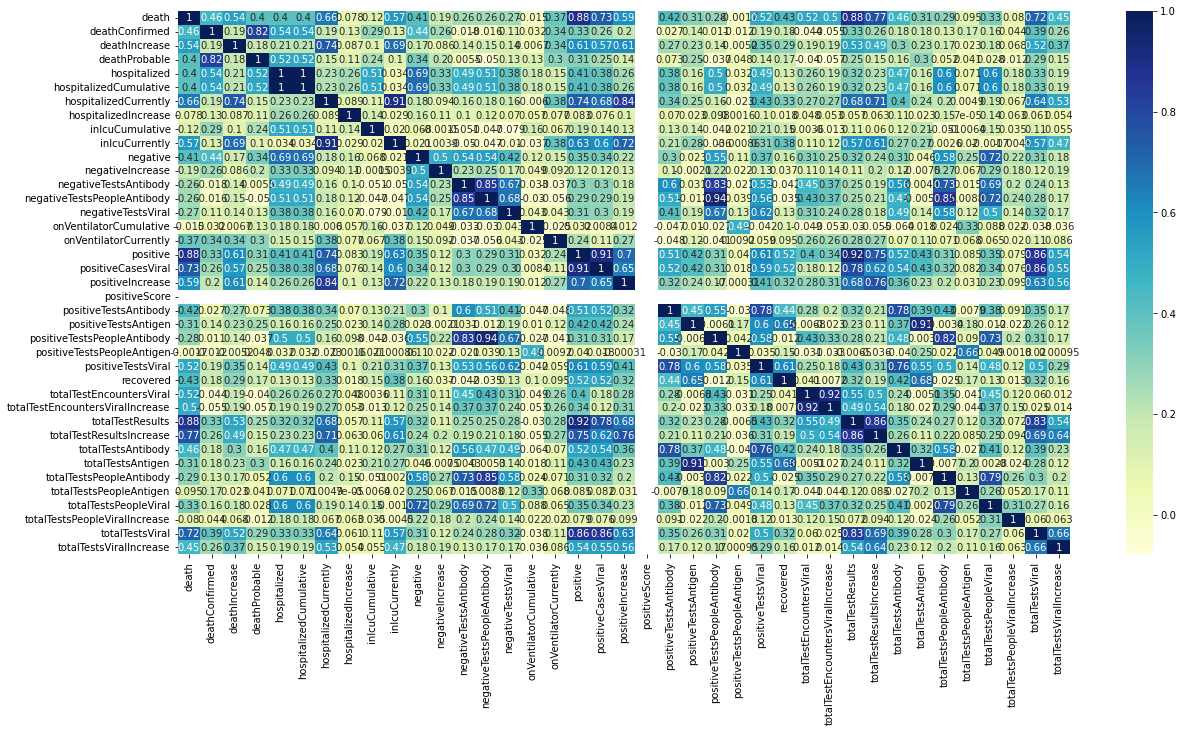

In [10]:
#Plotting a heatmap
plt.figure(figsize=(20,10))  #Define the size of the heat map
heat_map = df.corr()    #Use the correlation function
sns.heatmap(heat_map,cmap = "YlGnBu",annot=True)   #Define the colors of the heatmap
print(heat_map)    #Print the heat map

<AxesSubplot:xlabel='death'>

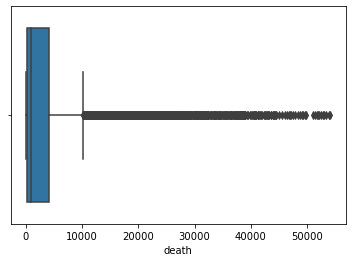

In [11]:
sns.boxplot(x = df['death'])                     #Check for outliers in 'death' column using boxplot


<AxesSubplot:xlabel='hospitalized'>

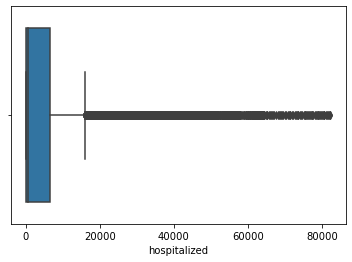

In [12]:
sns.boxplot(x = df['hospitalized'])               #Check for outliers in 'hospitalized' column using boxplot


<AxesSubplot:xlabel='hospitalizedCurrently'>

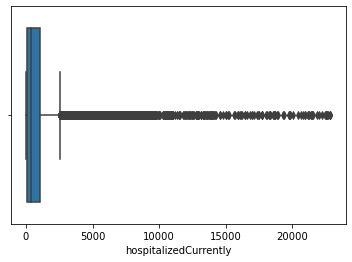

In [13]:
sns.boxplot(x = df['hospitalizedCurrently'])       #Check for outliers in 'hospitalizedCurrently' column using boxplot


<AxesSubplot:xlabel='inIcuCurrently'>

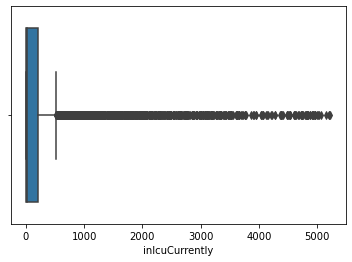

In [14]:
sns.boxplot(x = df['inIcuCurrently'])         #Check for outliers in 'inIcuCurrently' column using boxplot


<AxesSubplot:xlabel='onVentilatorCurrently'>

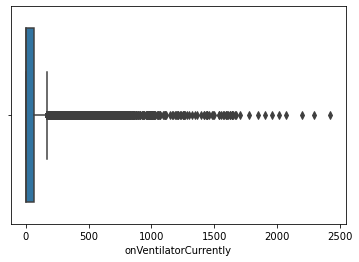

In [15]:
sns.boxplot(x = df['onVentilatorCurrently'])       #Check for outliers in 'onVentilatorCurrently' column using boxplot


<AxesSubplot:xlabel='positiveIncrease'>

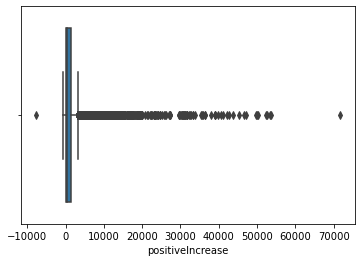

In [16]:
sns.boxplot(x = df['positiveIncrease'])        #Check for outliers in 'positiveIncreased' column using boxplot


<AxesSubplot:xlabel='negativeIncrease'>

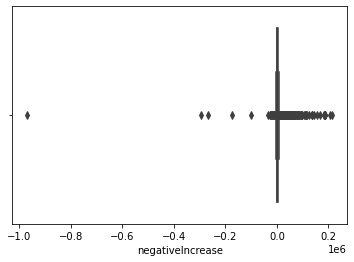

In [17]:
sns.boxplot(x = df['negativeIncrease'])      #Check for outliers in 'negativeIncreased' column using boxplot


<AxesSubplot:xlabel='recovered'>

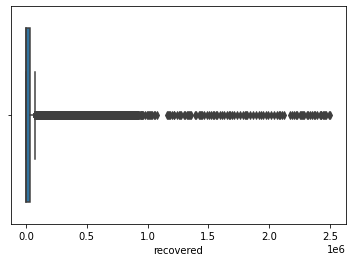

In [18]:
sns.boxplot(x = df['recovered'])   #Check for outliers in 'recovered' column using boxplot


array([[<AxesSubplot:title={'center':'death'}>,
        <AxesSubplot:title={'center':'deathConfirmed'}>,
        <AxesSubplot:title={'center':'deathIncrease'}>,
        <AxesSubplot:title={'center':'deathProbable'}>,
        <AxesSubplot:title={'center':'hospitalized'}>,
        <AxesSubplot:title={'center':'hospitalizedCumulative'}>],
       [<AxesSubplot:title={'center':'hospitalizedCurrently'}>,
        <AxesSubplot:title={'center':'hospitalizedIncrease'}>,
        <AxesSubplot:title={'center':'inIcuCumulative'}>,
        <AxesSubplot:title={'center':'inIcuCurrently'}>,
        <AxesSubplot:title={'center':'negative'}>,
        <AxesSubplot:title={'center':'negativeIncrease'}>],
       [<AxesSubplot:title={'center':'negativeTestsAntibody'}>,
        <AxesSubplot:title={'center':'negativeTestsPeopleAntibody'}>,
        <AxesSubplot:title={'center':'negativeTestsViral'}>,
        <AxesSubplot:title={'center':'onVentilatorCumulative'}>,
        <AxesSubplot:title={'center':'onVentilato

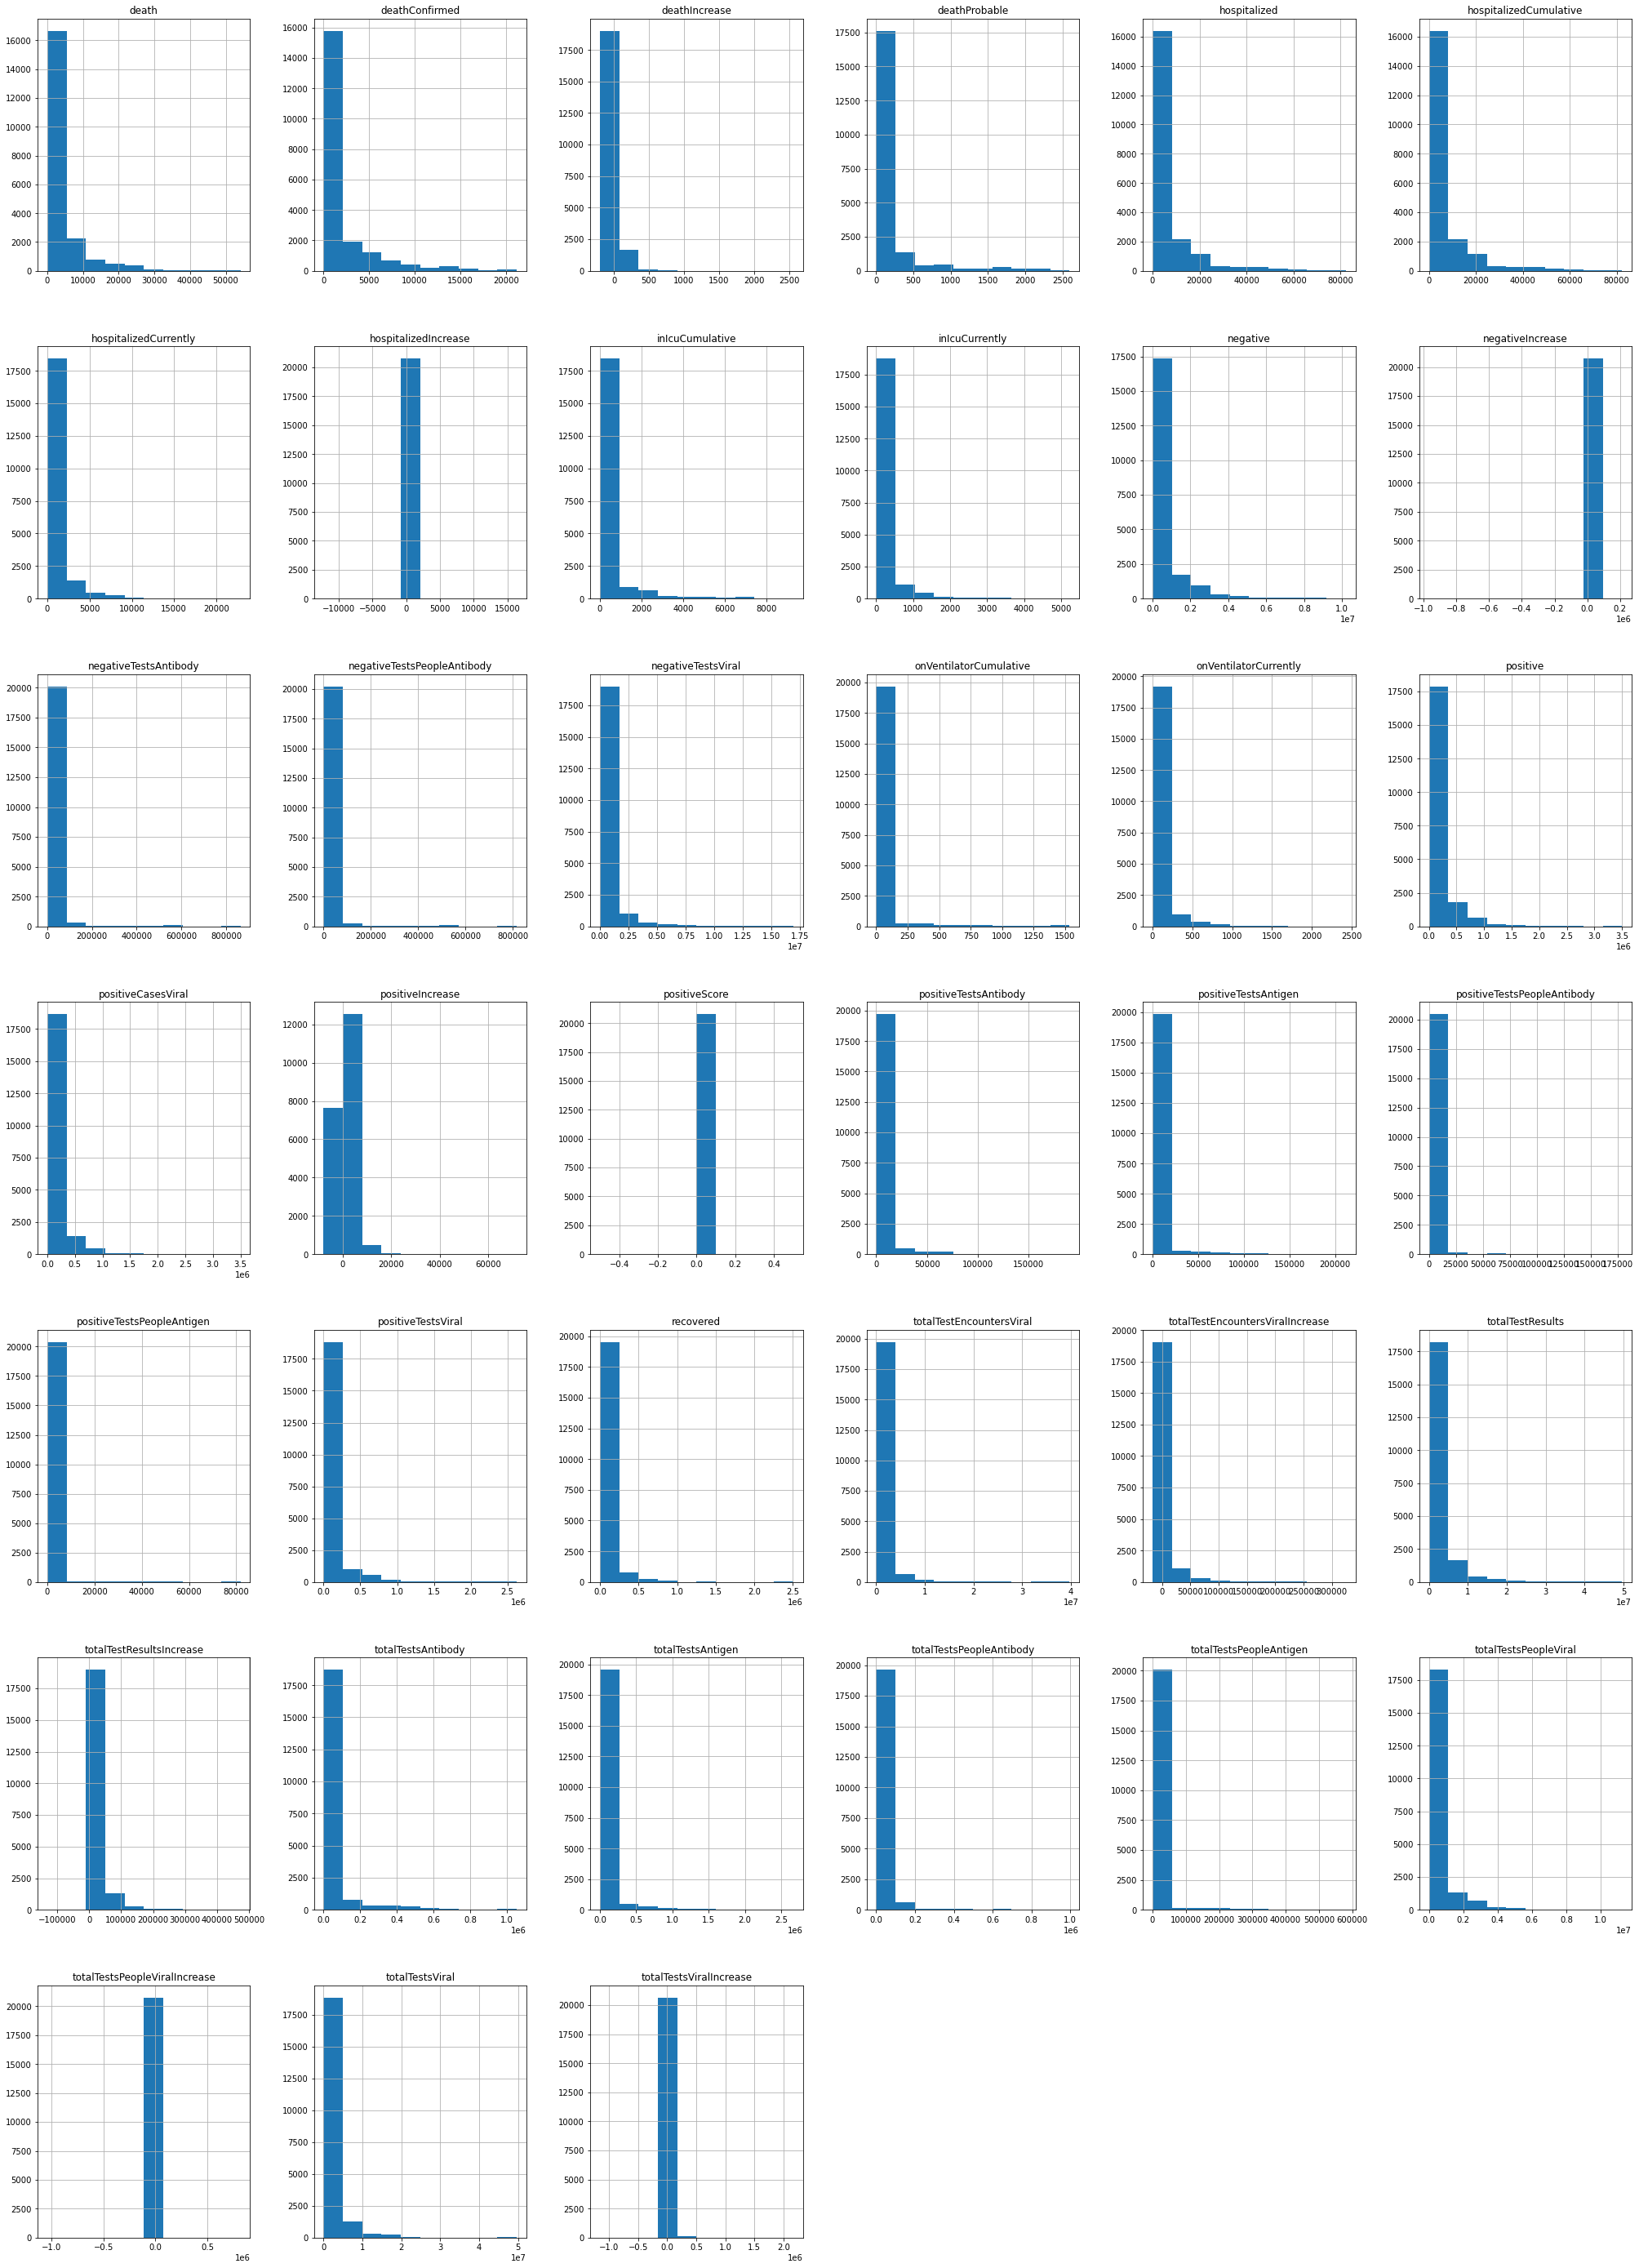

In [19]:
# Plotting bar graphs for all the variables
fig = plt.figure(figsize = (35,50))
ax = fig.gca()
df.hist(ax = ax)

#### Most of the columns are positively skewed, here the mean of positively skewed data will be greater than the median.

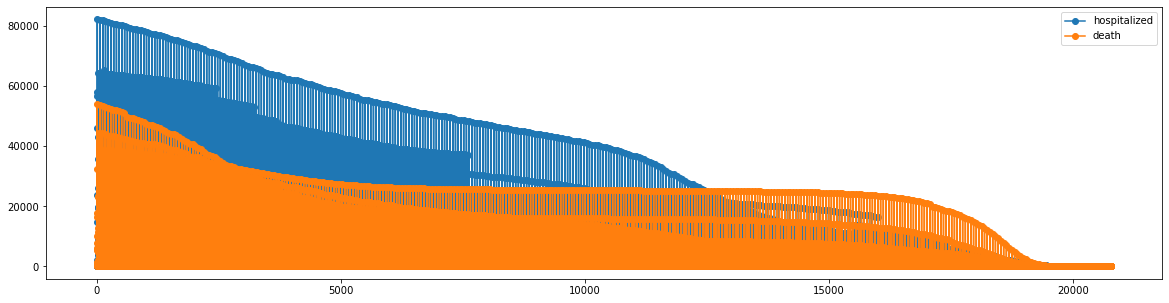

In [21]:
# Creating a plot to visualize deaths vs hospitalized patients
df.plot(y=['hospitalized', 'death',], figsize=(20,5), marker='o');     

#### This helps understand the mortality rate of the population due to COVID-19 virus. 
#### Even though the hospitalizations seem to be decreasing the deaths are constant for a long period of time.

<AxesSubplot:xlabel='state'>

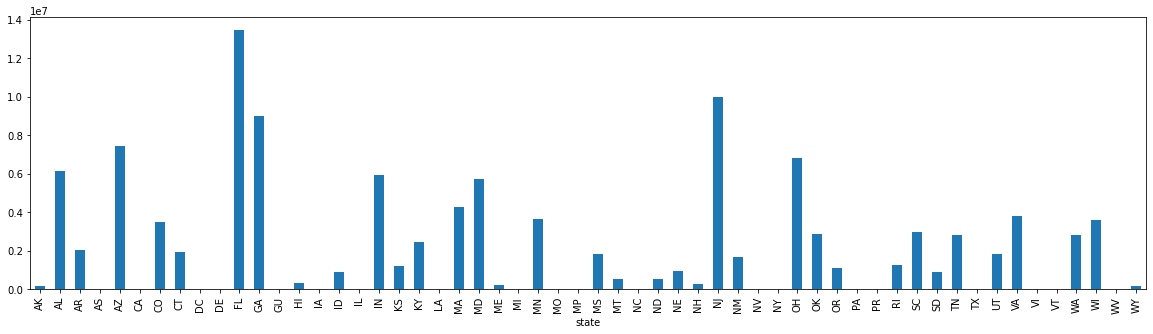

In [23]:
#Plot for state-wise hospitalizations
df.groupby(['state'])['hospitalized'].sum().plot(kind = 'bar',  figsize=(20,5))

In [25]:
# Finding maximum deaths ever recorded per day
max_deaths = df.loc[df['death'] == max(df['death'])]
max_deaths

date state    death  deathConfirmed  deathIncrease  deathProbable  \
5  2021-03-07    CA  54124.0             0.0            258            0.0   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
5           0.0                     0.0                 4291.0   

   hospitalizedIncrease  ...  totalTestResults  totalTestResultsIncrease  \
5                     0  ...        49646014.0                    133186   

   totalTestsAntibody  totalTestsAntigen  totalTestsPeopleAntibody  \
5                 0.0                0.0                       0.0   

   totalTestsPeopleAntigen  totalTestsPeopleViral  \
5                      0.0                    0.0   

   totalTestsPeopleViralIncrease  totalTestsViral  totalTestsViralIncrease  
5                              0       49646014.0                   133186  

[1 rows x 41 columns]

<AxesSubplot:xlabel='state'>

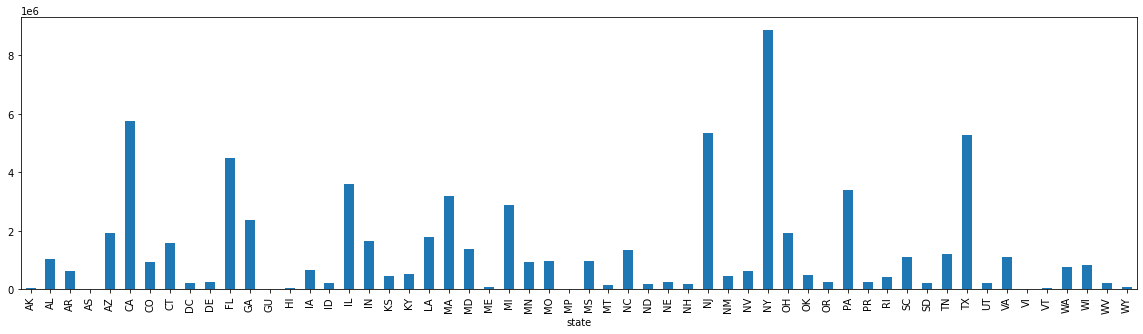

In [26]:
#Plot for state-wise deaths
df.groupby(['state'])['death'].sum().plot(kind = 'bar',  figsize=(20,5))

#### Although the hospitalizations in Florida is the highest, the maximum number of deaths are in New York

In [28]:
df.dtypes

date                              object
state                             object
death                            float64
deathConfirmed                   float64
deathIncrease                      int64
                                  ...   
totalTestsPeopleAntigen          float64
totalTestsPeopleViral            float64
totalTestsPeopleViralIncrease      int64
totalTestsViral                  float64
totalTestsViralIncrease            int64
Length: 41, dtype: object

In [29]:
# setting df index as date
df["date"]=pd.to_datetime(df["date"])

In [30]:
#Grouping different types of cases as per the date
datewise=df.groupby(["date"]).agg({"positive":'sum',"recovered":'sum',"death":'sum'})
datewise["Days Since"]=datewise.index-datewise.index[0]

In [31]:
datewise

positive   recovered     death Days Since
date                                                   
2020-01-13         0.0         0.0       0.0     0 days
2020-01-14         0.0         0.0       0.0     1 days
2020-01-15         0.0         0.0       0.0     2 days
2020-01-16         0.0         0.0       0.0     3 days
2020-01-17         0.0         0.0       0.0     4 days
...                ...         ...       ...        ...
2021-03-03  28520365.0  10809992.0  508665.0   415 days
2021-03-04  28585852.0  10855515.0  510408.0   416 days
2021-03-05  28654639.0  10882166.0  512629.0   417 days
2021-03-06  28714654.0  10912208.0  514309.0   418 days
2021-03-07  28756489.0  10933942.0  515151.0   419 days

[420 rows x 4 columns]

In [32]:
# Plotting Date-wise Recovered Cases
fig=px.bar(x=datewise.index,y=datewise["recovered"]+datewise["death"])
fig.update_layout(title="Distribution of Number of Recovered Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

#### This plot depicts that the recovered cases steeply started rising from Jan onwards.

In [33]:
# Plotting Weekly Growth of types of cases
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["positive"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["death"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### Through Week 25, the confirmed cases started rising exponentially while the recovery rate is increasing gradually. 

In [34]:
#Plotting Growth of different types of cases
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["positive"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### Confirmed cases started increasing with huge spike from Nov 2020

In [35]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["death"]/datewise["positive"])*100
datewise["Recovery Rate"]=(datewise["recovered"]/datewise["positive"])*100
datewise["Active Cases"]=datewise["positive"]-datewise["recovered"]-datewise["death"]
datewise["Closed Cases"]=datewise["recovered"]+datewise["death"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["recovered"]/datewise["positive"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["death"]/datewise["positive"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 3.0811072348595387
Median Mortality Rate 2.6626517254495714
Average Recovery Rate 22.09855525602634
Median Recovery Rate 27.668506986117173


#### Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#### Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
#### Mortality rate is showing a considerable for a pretty long time, which is positive sign
#### Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing

In [36]:
#Plotting daily increase in cases, by type of case
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["positive"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["death"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["positive"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average increase in number of Confirmed Cases every day:  68468.0
Average increase in number of Recovered Cases every day:  26033.0
Average increase in number of Deaths Cases every day:  1227.0


#### Although the deaths were not increasing at a huge rate as it did during May 2020, the confirmed cases have never been below 100k after Nov 2020

In [37]:
# plotting different cases based on 7 days rolling mean
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["positive"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="7 Days Rolling Mean of Daily Increase of Confirmed, Recovered and Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


### Exploratory Analysis (Derived Plots)

#### Growth Factor
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases**.

A growth factor **above 1 but trending downward** is a positive sign, whereas a **growth factor constantly above 1 is the sign of exponential growth**.

A growth factor **constant at 1 indicates there is no change in any kind of cases**.

In [38]:
# PLotting datewise growth factor of different types of cases
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["positive"]/datewise["positive"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"]/datewise["recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"]/datewise["death"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

#### Growth Factor for Active and Closed Cases
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Active and Closed Cases) / new (Active and Closed Cases) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases.**

A growth factor **above 1 but trending downward is a positive sign.**

A growth factor **constant at 1 indicates there is no change in any kind of cases.**

A growth factor **below 1 indicates real positive sign implying more patients are getting recovered or dying as compared to the Confirmed Cases.**

In [39]:
# PLotting datewise growth factor of different types of active and closed cases
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise["positive"]-datewise["recovered"]-datewise["death"])/(datewise["positive"]-datewise["recovered"]-datewise["death"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["recovered"]+datewise["death"])/(datewise["recovered"]+datewise["death"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

#### Growth Factor constantly above 1 is an clear indication of Exponential increase in all form of cases.

### Rate of Doubling for Confirmed Cases

In [40]:
# setting the doubling rate cases count to 500
d=500
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["positive"]<=d].iloc[[-1]]["Days Since"][0])
    C.append(d)
    d=d*2
    if(d<datewise["positive"].max()):
        continue
    else:
        break

In [41]:
# checking the doubling count
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first Case"])
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])
doubling_rate

No. of cases Days since first Case Number of days for doubling
0            500               53 days                     53 days
1           1000               55 days                      2 days
2           2000               58 days                      3 days
3           4000               60 days                      2 days
4           8000               63 days                      3 days
5          16000               65 days                      2 days
6          32000               68 days                      3 days
7          64000               71 days                      3 days
8         128000               74 days                      3 days
9         256000               80 days                      6 days
10        512000               88 days                      8 days
11       1024000              106 days                     18 days
12       2048000              151 days                     45 days
13       4096000              193 days                     42 days
14       8192000              280 days                     87 days
15      16384000              335 days                     55 days

#### Doubling Rate is fluctuating very much, which ideally supposed to increase if we are successfully faltening the curve.

# Prediction


### Linear Regression for Prediction of Confirmed Cases

In [42]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [45]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [46]:
lin_reg=LinearRegression(normalize=True)

In [47]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["positive"]).reshape(-1,1))

LinearRegression(normalize=True)

In [48]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [49]:
model_scores.append(np.sqrt(mean_absolute_error(valid_ml["positive"],prediction_valid_linreg)))
print("Mean Absolute Error for Linear Regression: ",np.sqrt(mean_absolute_error(valid_ml["positive"],prediction_valid_linreg)))


Mean Absolute Error for Linear Regression:  2843.2559842886844


In [50]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["positive"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

#### The Linear Regression Model is absolutely falling aprat. As it is clearly visible that the trend of Confirmed Cases in absolutely not Linear.

### Support Vector Machine ModelRegressor for Prediction of Confirmed Cases 

In [51]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [52]:
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [53]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["positive"]).reshape(-1,1))

SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [54]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [55]:
model_scores.append(np.sqrt(mean_absolute_error(valid_ml["positive"],prediction_valid_svm)))
print("Mean Absolute Error for Support Vectore Machine: ",np.sqrt(mean_absolute_error(valid_ml["positive"],prediction_valid_svm)))

Mean Absolute Error for Support Vectore Machine:  3593.8969962012893


In [56]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["positive"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

#### Support Vector Machine model isn't providing great results now, the predictions are either overshooting or really lower than what's expected.

### Prediction Deaths

In [57]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [58]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [59]:
lin_reg=LinearRegression(normalize=True)

In [60]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["death"]).reshape(-1,1))

LinearRegression(normalize=True)

In [61]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [62]:
model_scores.append(np.sqrt(mean_absolute_error(valid_ml["death"],prediction_valid_linreg)))
print("Mean Absolute Error for Linear Regression: ",np.sqrt(mean_absolute_error(valid_ml["death"],prediction_valid_linreg)))

### HUGE RMS, bad MODEL

Mean Absolute Error for Linear Regression:  334.94448077283846


In [63]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"],
                    mode='lines+markers',name="Train Data for Deaths"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Deaths Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

### SVM Deaths

In [64]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [65]:
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [66]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["death"]).reshape(-1,1))

SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [67]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [68]:
model_scores.append(np.sqrt(mean_absolute_error(valid_ml["death"],prediction_valid_svm)))
print("Mean Absolute Error for Support Vectore Machine: ",np.sqrt(mean_absolute_error(valid_ml["death"],prediction_valid_svm)))

Mean Absolute Error for Support Vectore Machine:  372.1425302380849


In [69]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Deaths Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

### Linear regression for Recovered

In [70]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [71]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [72]:
lin_reg=LinearRegression(normalize=True)

In [73]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["recovered"]).reshape(-1,1))

LinearRegression(normalize=True)

In [74]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [75]:
model_scores.append(np.sqrt(mean_absolute_error(valid_ml["recovered"],prediction_valid_linreg)))
print("Mean Absolute Error for Linear Regression: ",np.sqrt(mean_absolute_error(valid_ml["recovered"],prediction_valid_linreg)))

### HUGE RMS, bad MODEL

Mean Absolute Error for Linear Regression:  1941.720716154996


In [76]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',name="Train Data for Recovered"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Recovered Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

### SVM for recovered

In [77]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [78]:
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [79]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["recovered"]).reshape(-1,1))

SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [80]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [81]:
model_scores.append(np.sqrt(mean_absolute_error(valid_ml["recovered"],prediction_valid_svm)))
print("Mean Absolute Error for Support Vectore Machine: ",np.sqrt(mean_absolute_error(valid_ml["recovered"],prediction_valid_svm)))

Mean Absolute Error for Support Vectore Machine:  2074.5004112041993


In [82]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Deaths Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

### Insights and Conclusion

#### We can see a common trend where the case count in high from Nov 2020. This might be because of many factors such as it being the Flu season, Vaccine rollout.

#### The recovery and doubling rate increased as time passed by because of antibodies tend to increase once a person contracts the virus